In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
sum(train.duplicated())
sum(test.duplicated())

0

In [6]:
train.isna().values.sum()

0

<AxesSubplot:xlabel='Activity', ylabel='count'>

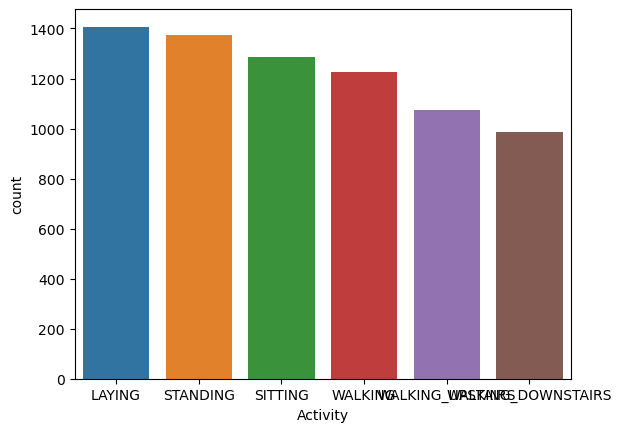

In [7]:
sns.countplot(train.Activity,order=train.Activity.value_counts().index)

In [10]:
    pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Text(-0.8, 16, 'Static Activities')

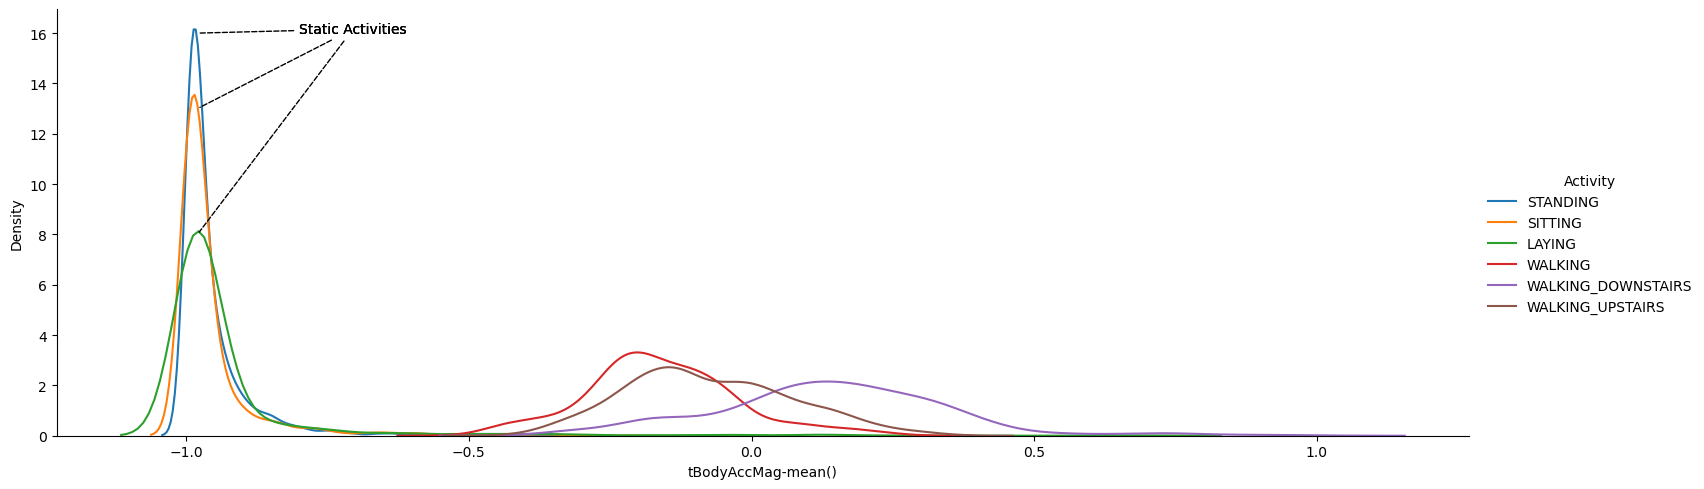

In [14]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()
plt.annotate('Static Activities',xy=(-.98,8),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.98,13),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.98,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})

<AxesSubplot:xlabel='Activity', ylabel='angle(Y,gravityMean)'>

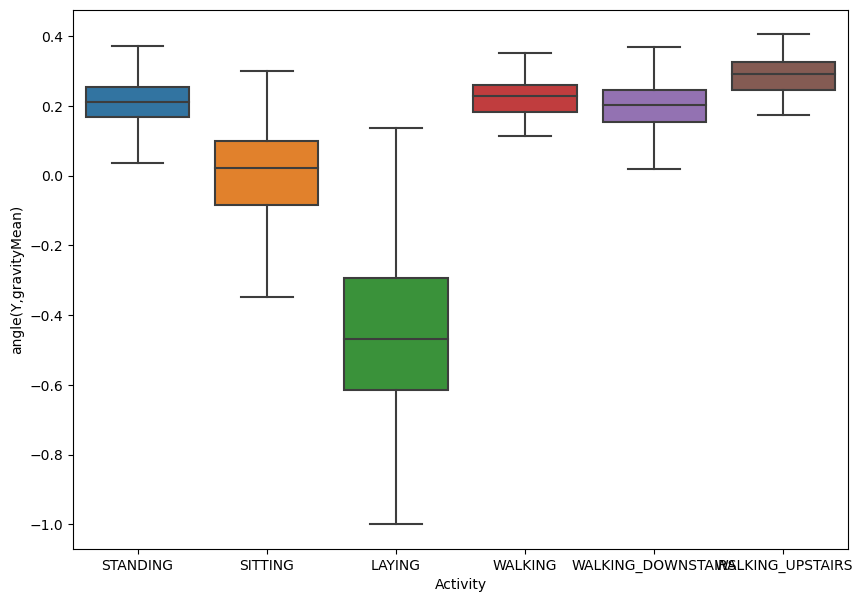

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data=train,showfliers=False)

In [17]:
x_for_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_for_pca)

In [18]:
pca


array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

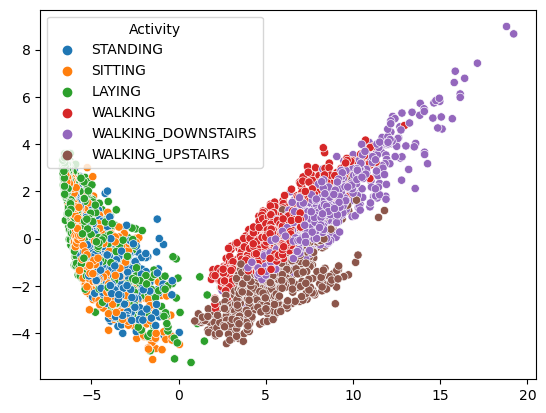

In [21]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])
plt.show()

In [23]:
x_for_tsne=train.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_for_tsne)
tsne

array([[ 63.4906   , -39.7206   ],
       [ 13.5708065, -39.372986 ],
       [ 16.88333  , -37.352337 ],
       ...,
       [ 60.73749  ,  14.081628 ],
       [ 60.48153  ,  14.081899 ],
       [ 59.754375 ,  14.62647  ]], dtype=float32)

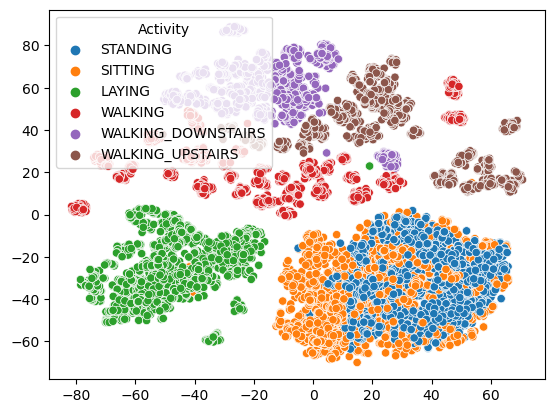

In [24]:
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])
plt.show()

In [25]:
x_train=train.drop(['subject','Activity'],axis=1)
y_train=train.Activity
x_test=test.drop(['subject','Activity'],axis=1)
y_test=test.Activity

In [28]:
parameters={'max_iter':[100,200,500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=42)
lr_classifier_rs.fit(x_train,y_train)
y_pred_lr=lr_classifier_rs.predict(x_test)

In [29]:
lr_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print('Accuracy using logistic regression:',lr_accuracy)

Accuracy using logistic regression: 0.954954954954955


In [40]:
def plot_confusion_matrix(cm,labels):
    fig,ax= plt.subplots(figsize=(12,8))
    im=ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1])),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels,
    yticklabels=labels,
    ylabel='True label',
    xlabel='predicted label'
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha='center',va='center',color='white' if cm[i,j]>thresh else 'black')
    fig.tight_layout()

In [43]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,50]     
}
svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=42)
svm_rs.fit(x_train,y_train)


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [44]:
y_pred=svm_rs.predict(x_test)
kernel_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print('Accuracy using kernel svm:', kernel_accuracy)

Accuracy using kernel svm: 0.965965965965966


In [54]:
parameters={'max_depth':np.arange(2,10,2)}
dt_classifier=DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier,param_distributions=parameters,cv=3,random_state=42)
dt_classifier_rs.fit(x_train,y_train)
y_pred=dt_classifier_rs.predict(x_test)
dt_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print('Accuracy using decision tree:', dt_accuracy)

Accuracy using decision tree: 0.8348348348348348


In [53]:
parameters={
    "n_estimators":np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}
rf_classifier=RandomForestClassifier()
rf_classifier_rs=RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state=42)
rf_classifier_rs.fit(x_train,y_train)
y_pred=rf_classifier_rs.predict(x_test)
rf_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print('Accuracy using random forest:', rf_accuracy)


Accuracy using random forest: 0.9049049049049049
